#Boosting

In [ ]:
import pandas as pd
breast = pd.read_csv('/content/drive/MyDrive/datasets/breast-cancer.csv')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
breast['diagnosis'] = np.where(breast['diagnosis'] == 'M', 1, 0)
features = ['area_mean', 'texture_mean']

x = breast[features]
y = breast['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 45, stratify = y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(170, 2) (399, 2) (170,) (399,)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier() #AdaBoostClassifier의 base_estimator 매개변수에는 기본적으로 DecisionTreeClassifier가 사용
pred = clf.fit(x_train, y_train).predict(x_test)
print('정확도: {}'.format(clf.score(x_test, y_test))) #clf.score() 메서드는 분류 모델에서 정확도(accuracy)를 계산하여 반환 clf.score(x_test, y_test)  accuracy_score(y_test, pred) 주의 해야됨


정확도: 0.8546365914786967


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
prs = precision_score(y_test, pred)
rs = recall_score(y_test, pred)
f1_s = f1_score(y_test, pred)

print(cm)
print()
print('정확도 : {}%'.format(round(acc*100, 2)))
print('정밀도 : {}%'.format(round(prs *100, 2)))
print('재현율 : {}%'.format(round(rs *100, 2)))
print('f1_스코어 : {}'.format(round(f1_s*100, 2)))

[[222  28]
 [ 30 119]]

정확도 : 85.46%
정밀도 : 80.95%
재현율 : 79.87%
f1_스코어 : 80.41


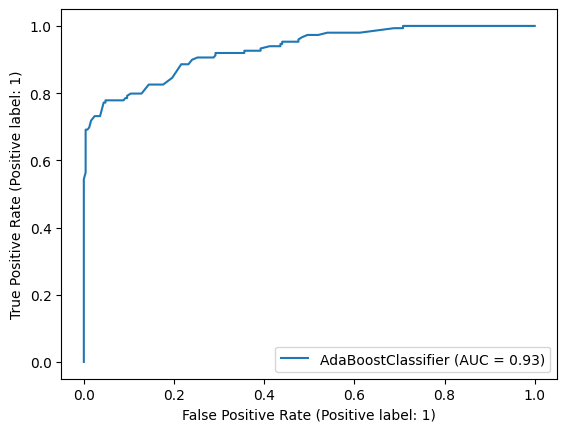

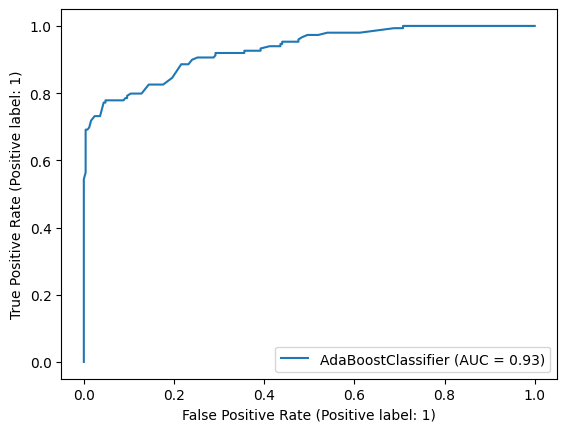

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

roc_dis = RocCurveDisplay.from_estimator(clf, x_test, y_test)

roc_dis.plot()
plt.show()


[[0.36866179 0.63133821]
 [0.67246116 0.32753884]
 [0.36866179 0.63133821]]


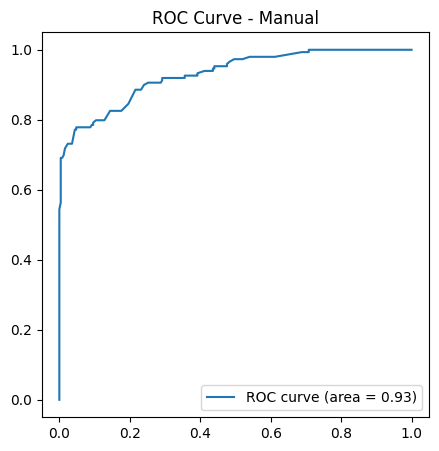

In [ ]:
from sklearn.metrics import  roc_curve, auc
plt.figure(figsize = (5, 5))
y_scores = clf.predict_proba(x_test)[:, 1]
print(clf.predict_proba(x_test)[:3,:])
fp, tp, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fp, tp)  # AUC 값 계산
plt.plot(fp, tp, label=f'ROC curve (area = {roc_auc:.2f})')
plt.title('ROC Curve - Manual')
# AUC 값 표시
plt.legend(loc='lower right')
plt.show()

In [ ]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_boost',
 '_boost_discrete',
 '_boost_real',
 '_check_X',
 '_check_feature_names',
 '_check_n_features',
 '_compute_proba_from_decision',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_validate_data',
 '_validate_estimator',
 '_validate_params',
 'algorithm',
 'base_estimator',
 'base_estimator_',
 'classes_',
 'decision_function',
 'es

In [ ]:
importances =clf.feature_importances_
columns_nm = pd.DataFrame(['area_mean','texture_mean'])
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)],axis = 1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

                        feature_nm  importances
0                  account.balance         0.62
1                              age         0.38
2                   apartment.type          NaN
3                     bank.credits          NaN
4                    credit.amount          NaN
5           credit.duration.months          NaN
6                   credit.purpose          NaN
7                   current.assets          NaN
8                       dependents          NaN
9              employment.duration          NaN
10                  foreign.worker          NaN
11                       guarantor          NaN
12                installment.rate          NaN
13                  marital.status          NaN
14                      occupation          NaN
15                   other.credits          NaN
16  previous.credit.payment.status          NaN
17              residence.duration          NaN
18                         savings          NaN
19                       telephone      

<BarContainer object of 2 artists>

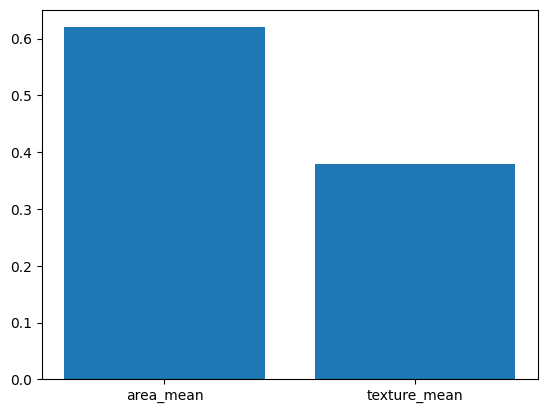

In [ ]:
f = features  #features = ['area_mean', 'texture_mean']
xtick_label_position = list(range(len(f)))
plt.xticks(xtick_label_position, f)
plt.bar([x for x in range(len(importances))], importances)